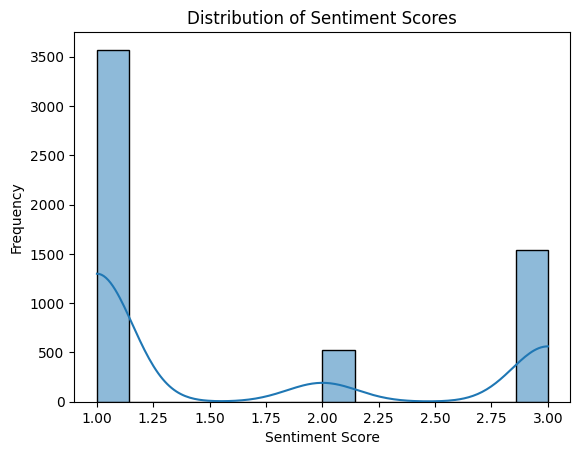

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.tsa.seasonal import seasonal_decompose
from wordcloud import WordCloud
# Load your CSV file
df = pd.read_csv('sentiments.csv')
df['sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'negative' else 2 if x == 'neutral' else 3)
sentiment_scores = df['sentiment'].values 
# Basic Preprocessing
# Ensure that 'timestamp' is in datetime format if it exists
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# Create additional features (e.g., comment length)
df['comment_length'] = df['Comment'].apply(len)
# --- Time Series Analysis ---
# If you have timestamp data, you can decompose the sentiment time series
if 'timestamp' in df.columns:
 df.set_index('timestamp', inplace=True)
 result = seasonal_decompose(df['sentiment'], model='additive', period=30) 
# Adjust period based on your data
 result.plot()
 plt.show()
# --- Sentiment Distribution Analysis ---
sns.histplot(df['sentiment'], kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

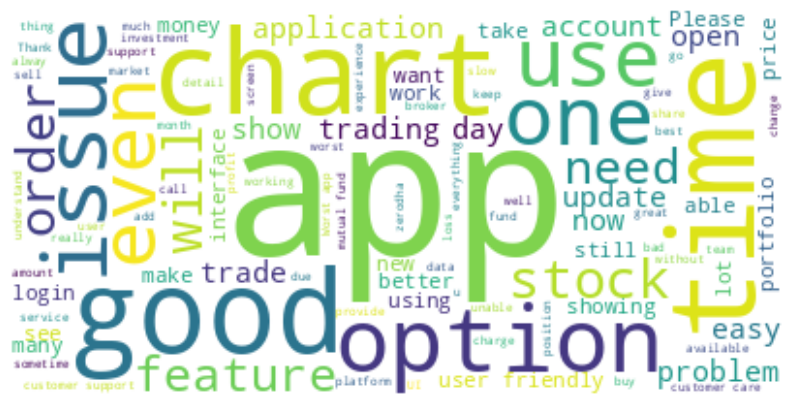

In [5]:
# --- Word Cloud for Comment Analysis ---
text = " ".join(comment for comment in df['Comment'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Linear Regression - Mean Squared Error: 0.7547
Decision Tree - Mean Squared Error: 0.8020
Support Vector Machine - Mean Squared Error: 0.8595
Random Forest - Mean Squared Error: 0.7987
XGBoost - Mean Squared Error: 0.7312


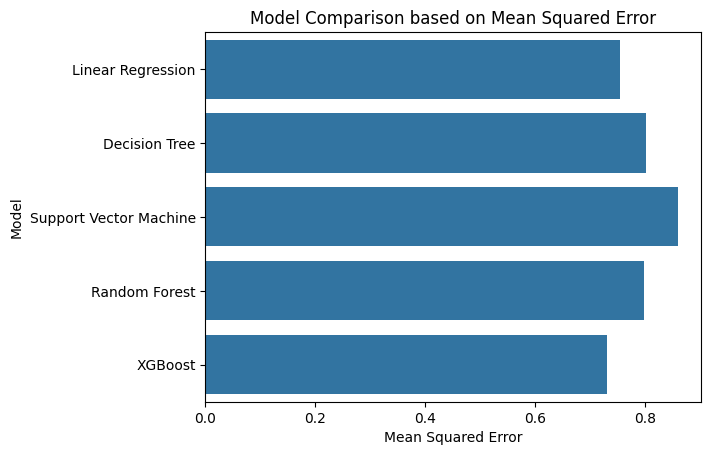

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Basic Preprocessing
# Ensure that 'timestamp' is in datetime format if it exists
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# Create additional features (e.g., comment length)
df['comment_length'] = df['Comment'].apply(len)
# Select features and target
X = df[['comment_length']] # Add other relevant features if available
y = df['sentiment']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=42)
# Initialize models
models = {
 'Linear Regression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(random_state=42),
 'Support Vector Machine': SVR(),
 'Random Forest': RandomForestRegressor(random_state=42),
 'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', 
random_state=42)
}
# Train, predict, and evaluate each model
results = {}
for name, model in models.items():
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 mse = mean_squared_error(y_test, y_pred)
 results[name] = mse
 print(f'{name} - Mean Squared Error: {mse:.4f}')
# Compare the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Mean Squared Error'])
sns.barplot(x='Mean Squared Error', y='Model', data=results_df)
plt.title("Model Comparison based on Mean Squared Error")
plt.show()

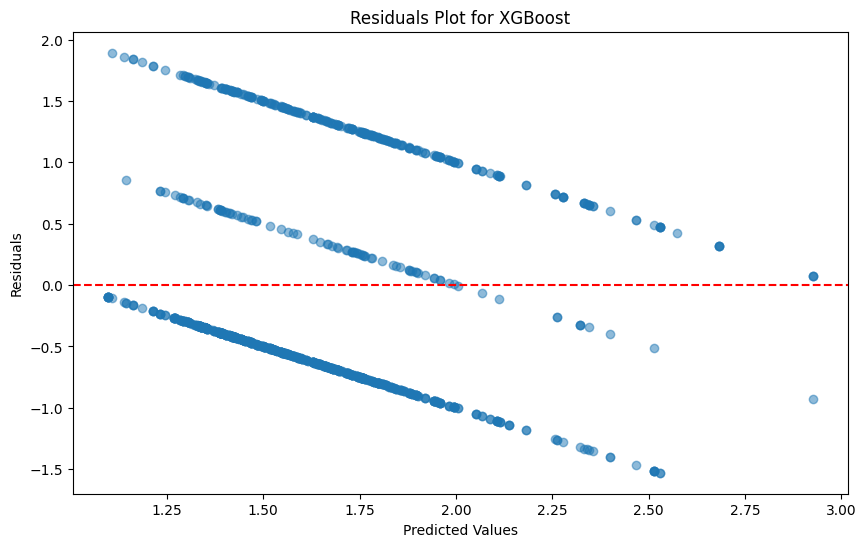

In [8]:
# Plot residuals for the best-performing model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
# Predict and calculate residuals
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot for {best_model_name}')
plt.show()


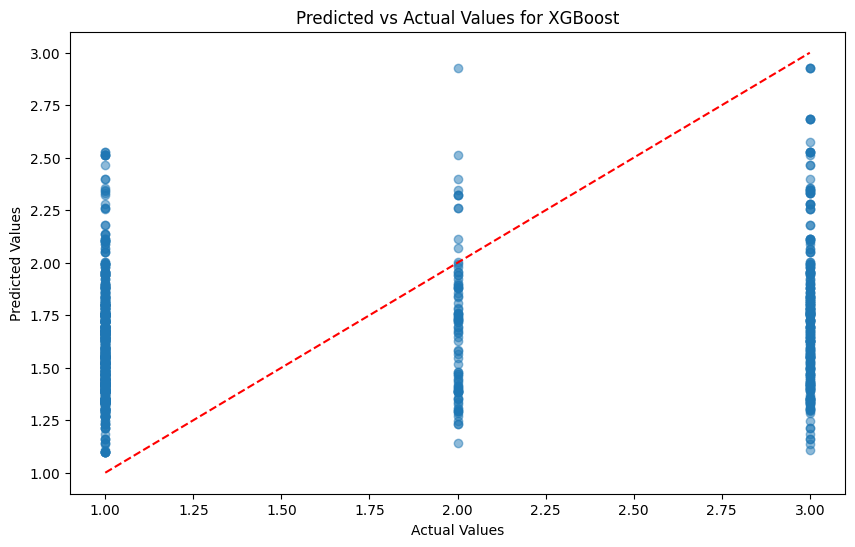

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual Values for {best_model_name}')
plt.show()


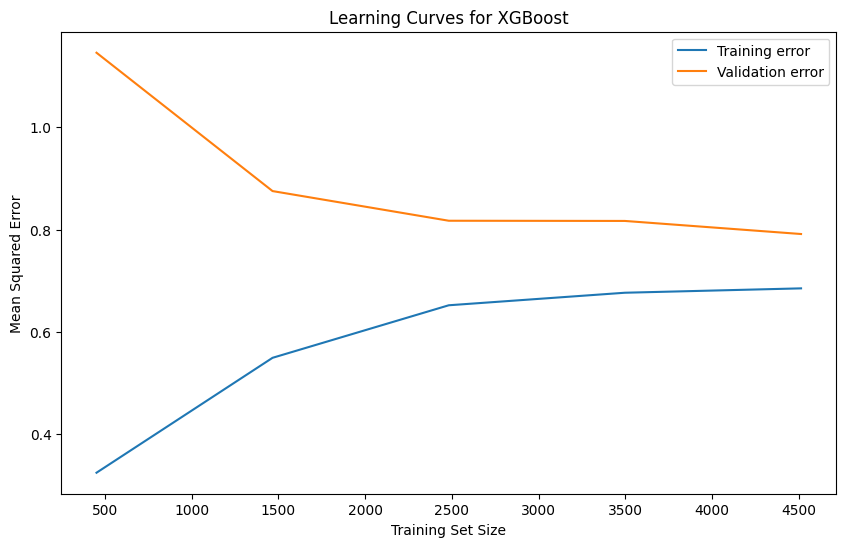

In [10]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, 
cv=5, scoring='neg_mean_squared_error')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training error')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title(f'Learning Curves for {best_model_name}')
plt.legend()
plt.show()


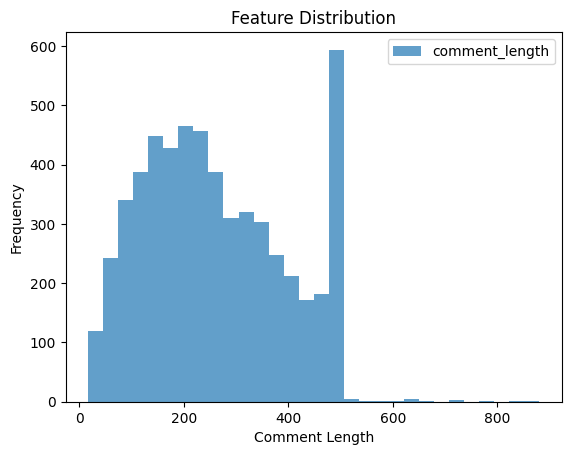

In [11]:
df[['comment_length']].plot(kind='hist', bins=30, alpha=0.7)
plt.xlabel('Comment Length')
plt.title('Feature Distribution')
plt.show()


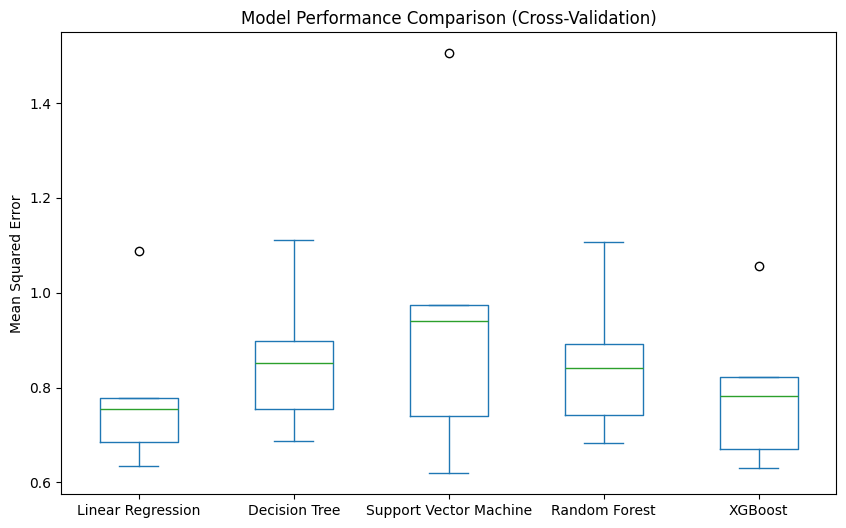

In [12]:
from sklearn.model_selection import cross_val_score
cv_results = {}
for name, model in models.items():
 scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
 cv_results[name] = -scores
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.plot.box(figsize=(10, 6))
plt.title('Model Performance Comparison (Cross-Validation)')
plt.ylabel('Mean Squared Error')
plt.show()

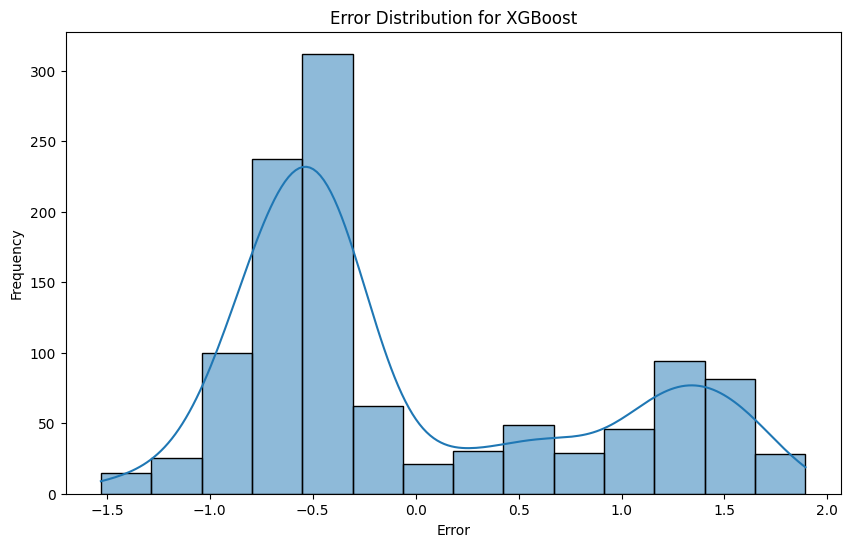

In [13]:
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title(f'Error Distribution for {best_model_name}')
plt.show()


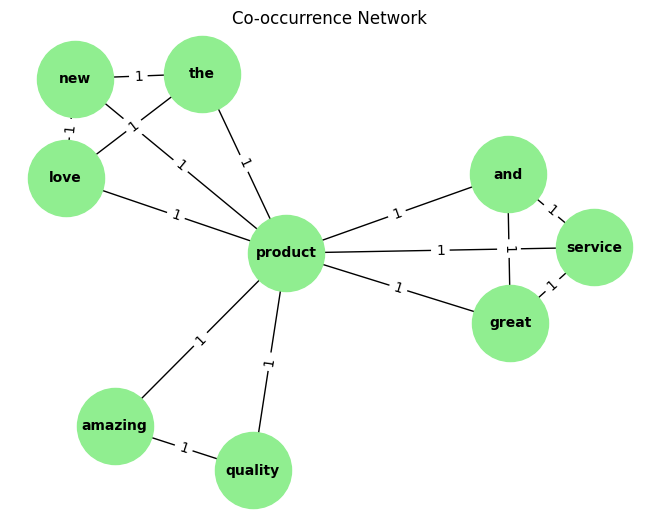

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
from networkx import Graph
# Example comments
comments = ['Love the new product', 'Great service and product', 'Amazing product quality']
# Create a count matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments)
terms = vectorizer.get_feature_names_out()
# Create a co-occurrence matrix
co_occurrence = (X.T @ X).toarray()
np.fill_diagonal(co_occurrence, 0)
# Build the network
G = Graph()
for i in range(len(terms)):
    G.add_node(terms[i])
for i in range(len(terms)):
    for j in range(i+1, len(terms)):
        if co_occurrence[i, j] > 0:
            G.add_edge(terms[i], terms[j], weight=co_occurrence[i, j])
# Draw the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', 
font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Co-occurrence Network')
plt.show()